<a href="https://colab.research.google.com/github/chinox02/TUGAS_UAS_DATA-MINING-KElLOMPOK-20-/blob/main/Deteksi_Stunting_Dengan_Random_Forest_dan_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset Dari Kaggle

In [ ]:
!kaggle datasets download -d rendiputra/stunting-balita-detection-121k-rows

Dataset URL: https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows
License(s): MIT
stunting-balita-detection-121k-rows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip stunting-balita-detection-121k-rows.zip

Archive:  stunting-balita-detection-121k-rows.zip
replace data_balita.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_balita.csv         


# Import Semua Library Yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# random forest scikit learn
from sklearn.ensemble import RandomForestClassifier
# ridge regression scikit learn
from sklearn.linear_model import RidgeClassifier

# Exploratory Dataset Analysis (EDA)

In [ ]:
#@title Load Dataset
df = pd.read_csv('data_balita.csv')

In [ ]:
#@title Tampilkan 5 Data Teratas
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
#@title Tampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
#@title Deskripsi Mengenai kolom Numerik
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:
#@title Cek Data Null
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

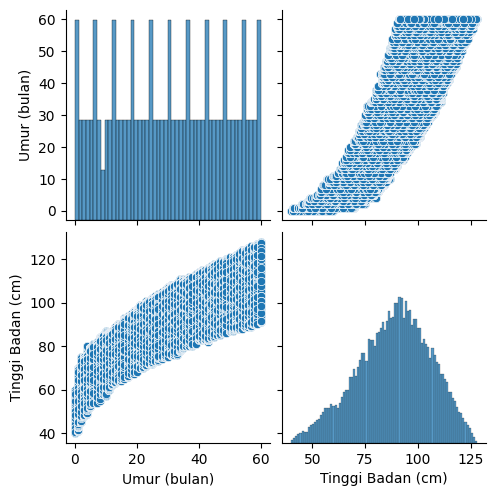

In [ ]:
#@title Plot Data Kolom Umur Dan Tinggi
sns.pairplot(df)

<Axes: xlabel='Jenis Kelamin', ylabel='count'>

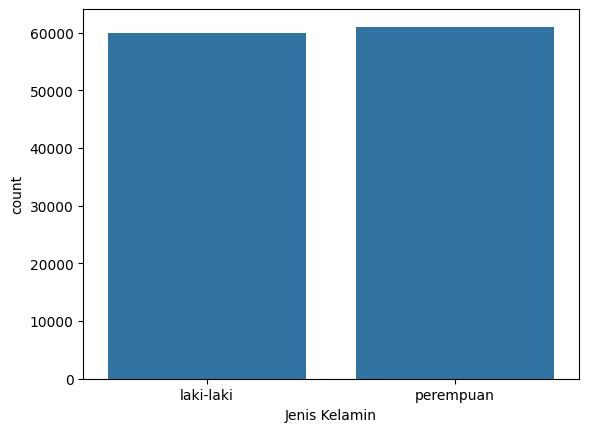

In [ ]:
#@title Plot Frekuensi Data Jenis Kelamin
sns.countplot(x='Jenis Kelamin', data=df)

<Axes: xlabel='Status Gizi', ylabel='count'>

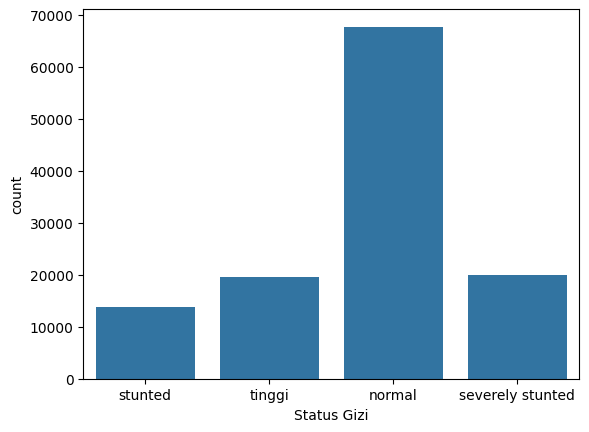

In [ ]:
#@title Plot Frekuensi Data Status Gizi
sns.countplot(x='Status Gizi', data=df)

## Mengubah data text/string menjadi data numerik

In [ ]:
jenis_kelamin_dict = {y:x for x, y in enumerate(df['Jenis Kelamin'].unique())}
status_gizi_dict = {y:x for x, y in enumerate(df['Status Gizi'].unique())}

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].map(jenis_kelamin_dict)
df['Status Gizi'] = df['Status Gizi'].map(status_gizi_dict)

In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,0
1,0,0,56.705203,1
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,3


# Normalisasi Data

In [ ]:
#@title Normalisasi kan kolom "Tinggi Badan (cm)"
max_tinggi = df['Tinggi Badan (cm)'].max()
min_tinggi = df['Tinggi Badan (cm)'].min()
df['Tinggi Badan (cm)'] = df['Tinggi Badan (cm)'].apply(lambda x: (x - min_tinggi) / (max_tinggi - min_tinggi))

In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,0.052069,0
1,0,0,0.189736,1
2,0,0,0.077883,2
3,0,0,0.085210,2
4,0,0,0.031061,3


# Split Dataset

In [ ]:
#@title Split Train Data Dan Test Data Dengan Formasi 80:20
from sklearn.model_selection import train_test_split

X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Dan Evaluasi

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(min_samples_split=5)
Random Forest Accuracy: 0.9992148760330578


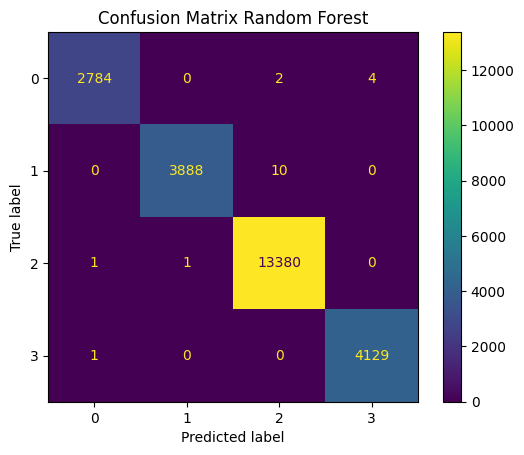

In [ ]:
#@title GridSearchCSV untuk Mencari Parameter Terbaik untuk Training Model Random Forest Sekaligus Training Model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)

# Assuming 'X' is your feature matrix and 'y' is your target variable
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
rf_best_params = rf_grid_search.best_params_
rf_best_estimator = rf_grid_search.best_estimator_

print("Best Parameters:", rf_best_params)
print("Best Estimator:", rf_best_estimator)

# Test Predict
rf_y_pred = rf_best_estimator.predict(X_test)

rf_accuracy = rf_grid_search.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=y.unique().tolist())
rf_cm_display.plot()
plt.title(f"Confusion Matrix Random Forest")
plt.show()

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameters: {'alpha': 0.1, 'solver': 'sag'}
Best Estimator: RidgeClassifier(alpha=0.1, solver='sag')
Ridge Accuracy: 0.6400413223140495


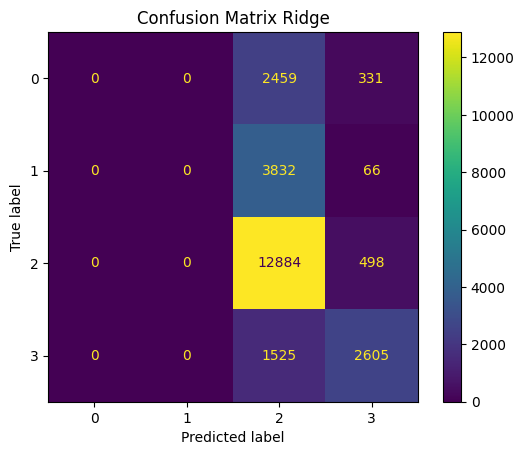

In [ ]:
#@title GridSearchCSV untuk Mencari Parameter Terbaik untuk Training Model Ridge Regression Sekaligus Training Model

ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge = RidgeClassifier()
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=5, n_jobs=-1, verbose=1)

# Assuming 'X' is your feature matrix and 'y' is your target variable
ridge_grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
ridge_best_params = ridge_grid_search.best_params_
ridge_best_estimator = ridge_grid_search.best_estimator_

print("Best Parameters:", ridge_best_params)
print("Best Estimator:", ridge_best_estimator)

# Test Predict
ridge_y_pred = ridge_best_estimator.predict(X_test)

ridge_accuracy = ridge_grid_search.score(X_test, y_test)
print("Ridge Accuracy:", ridge_accuracy)

ridge_cm = confusion_matrix(y_test, ridge_y_pred)
ridge_cm_display = ConfusionMatrixDisplay(confusion_matrix=ridge_cm, display_labels=y.unique().tolist())
ridge_cm_display.plot()
plt.title(f"Confusion Matrix Ridge")
plt.show()

Jika dilihat hasil GridSearchCSV pada kedua algoritma diatas, kita bisa mendapatkan kesimpulan bahwa **algoritma Random Forest jauh lebih baik daripada dlgoritma Ridge Regression**.

In [ ]:
df_res = pd.read_csv('data_balita.csv')
df_res["Random Forest Prediction"] = 0
df_res["Ridge Regression Prediction"] = 0

In [ ]:
df_res["Jenis Kelamin Clear"] = df_res["Jenis Kelamin"].map(jenis_kelamin_dict)
df_res["Status Gizi Clear"] = df_res["Status Gizi"].map(status_gizi_dict)

In [ ]:
df_res["Tinggi Badan Clear"] = df_res["Tinggi Badan (cm)"].apply(lambda x: (x - min_tinggi) / (max_tinggi - min_tinggi))

In [ ]:
df_res.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Random Forest Prediction,Ridge Regression Prediction,Jenis Kelamin Clear,Status Gizi Clear,Tinggi Badan Clear
0,0,laki-laki,44.591973,stunted,0,0,0,0,0.052069
1,0,laki-laki,56.705203,tinggi,0,0,0,1,0.189736
2,0,laki-laki,46.863358,normal,0,0,0,2,0.077883
3,0,laki-laki,47.508026,normal,0,0,0,2,0.085210
4,0,laki-laki,42.743494,severely stunted,0,0,0,3,0.031061


In [ ]:
fitur = ["Umur (bulan)", "Tinggi Badan Clear", "Jenis Kelamin Clear"]
label = "Status Gizi Clear"
for i in range(len(df_res)):
  df_res.loc[i, "Random Forest Prediction"] = rf_best_estimator.predict([df_res.loc[i, fitur]])[0]
  df_res.loc[i, "Ridge Regression Prediction"] = ridge_best_estimator.predict([df_res.loc[i, fitur]])[0]

In [ ]:
df_res.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Random Forest Prediction,Ridge Regression Prediction,Jenis Kelamin Clear,Status Gizi Clear,Tinggi Badan Clear
0,0,laki-laki,44.591973,stunted,3,3,0,0,0.052069
1,0,laki-laki,56.705203,tinggi,3,3,0,1,0.189736
2,0,laki-laki,46.863358,normal,3,3,0,2,0.077883
3,0,laki-laki,47.508026,normal,3,3,0,2,0.085210
4,0,laki-laki,42.743494,severely stunted,3,3,0,3,0.031061


In [ ]:
df_res.to_excel("classification_res.xlsx", index=False)

In [ ]:
#@title Evaluasi Dari Model Random Forest
from sklearn.metrics import classification_report

# Classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(df_res[label], df_res["Random Forest Prediction"]))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13815
           1       0.17      0.52      0.25     19560
           2       0.00      0.00      0.00     67755
           3       0.17      0.52      0.26     19869

    accuracy                           0.17    120999
   macro avg       0.08      0.26      0.13    120999
weighted avg       0.06      0.17      0.08    120999



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title Evaluasi Dari Model Ridge Regression
# Classification report for Ridge Regression
print("\nClassification Report for Ridge Regression:")
print(classification_report(df_res[label], df_res["Ridge Regression Prediction"]))


Classification Report for Ridge Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13815
           1       0.23      0.30      0.26     19560
           2       0.62      0.32      0.42     67755
           3       0.17      0.52      0.26     19869

    accuracy                           0.31    120999
   macro avg       0.26      0.29      0.24    120999
weighted avg       0.41      0.31      0.32    120999



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Jika kita lihat pada hasil prediksi menggunakan seluruh dataset ternyata **Algoritma Ridge Regression lah yang jauh lebih baik daripada algoritma Random Forest**. Kemungkinan hal ini terjadi karena 2 fitur yang digunakan Umur Balita dan Tinggi Badan yang adalah tipe data kontinu, hal inilah yang membuat algoritma Ridge Regression jauh lebih unggul daripada Random Forest pada Evaluasi akhir ini.